# Overview
* Here, I plot the t maps from step02_singletrial_covPE.mlx
* Analysis: PE as parametric regressors
* "What are the neural correlates of prediction errors across different tasks? Are there brain regions where activation increases with larger prediction errors?"

In [1]:
# load brain data
# plot subcortical in canlab atlas
# plot surface data
# plot in MNI
import os
from os.path import join
from neuromaps.parcellate import Parcellater
from matplotlib.colors import LinearSegmentedColormap, to_rgba
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from nilearn import plotting
from neuromaps.datasets import fetch_fslr
from neuromaps import transforms
import nibabel as nib

/Users/h/miniconda3/envs/spacetop/lib/python3.11/site-packages/nilearn/input_data/__init__.py:23: FutureWarning: The import path 'nilearn.input_data' is deprecated in version 0.9. Importing from 'nilearn.input_data' will be possible at least until release 0.13.0. Please import from 'nilearn.maskers' instead.
  warnings.warn(message, FutureWarning)


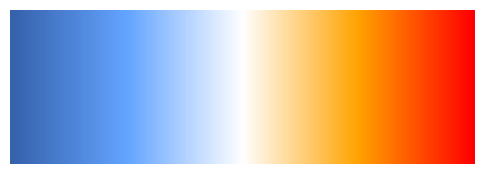

In [2]:
# Define the colors at specific points
colors = [
    (-2, "#120041"),  # Start with blue at -1.9
    (-1.5, "#2500fa"),
    (-1, "#84c6fd"),  # Start with blue at -1.9
    (0, "white"),    # Transition to white at 0
    (1, "#ff0000"),
    # (1.5, "#ff0000"),    # Start transitioning to red just after 0 towards 1.2
    (2, "#ffd400")  # End with yellow at 1.2
]

colors_with_opacity = [
    (-2, to_rgba("#3661ab", alpha=1.0)),  # Fully opaque
    (-1.5, to_rgba("#63a4ff", alpha=1.0)),  # Fully opaque
    # (-0.1, to_rgba("#008bff", alpha=0.6)),  # Fully opaque
    (0, to_rgba("white", alpha=1.0)),       # Fully opaque
    # (0.1, to_rgba("#d50044", alpha=0.6)),   # 30% opacity
    (1, to_rgba("#ffa300", alpha=1.0)),   # 60% opacity
    (2, to_rgba("#ff0000", alpha=1.0))    # Fully opaque
]



# Normalize the points to the [0, 1] interval
norm_points = np.linspace(-2, 2, len(colors_with_opacity))
norm_colors = [c[1] for c in colors_with_opacity]
norm_points = (norm_points - norm_points.min()) / (norm_points.max() - norm_points.min())

# Create a custom colormap
custom_cmap = LinearSegmentedColormap.from_list("custom_gradient", list(zip(norm_points, norm_colors)))

# Create a gradient image
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

# Plot the gradient
fig, ax = plt.subplots(figsize=(6, 2))
ax.imshow(gradient, aspect='auto', cmap=custom_cmap)
ax.set_axis_off()

plt.show()

In [3]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
import glob

def plot_brain_surfaces(image, cbar_label='INSERT LABEL', cmap='viridis', 
                        color_range=None):
                        # filename='brain_surface_plot.png'):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    - filename: Filename to save the plot. Defaults to 'brain_surface_plot.png'.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior', 'dorsal'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': image[0], 
            'right': image[1]}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
#     p.savefig(filename, dpi=300)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))


In [4]:
from nilearn import image, plotting
from surfplot import Plot
from neuromaps.transforms import fsaverage_to_fslr
import glob

def plot_nonmedial_brain_surfaces(imageL, imageR, cbar_label='INSERT LABEL', cmap='viridis', 
                        color_range=None):
                        # filename='brain_surface_plot.png'):
    """
    Plot brain surfaces with the given data.

    Parameters:
    - TST: Tuple of (left hemisphere data, right hemisphere data) to be plotted.
    - cbar_label: Label for the color bar.
    - cmap: Colormap for the data.
    - color_range: Optional. Tuple of (min, max) values for the color range. If not provided, the range is auto-detected.
    - filename: Filename to save the plot. Defaults to 'brain_surface_plot.png'.
    """
    surfaces_fslr = fetch_fslr()
    lh_fslr, rh_fslr = surfaces_fslr['inflated']
    
    p = Plot(surf_lh=lh_fslr,
             surf_rh=rh_fslr, 
             size=(5000, 1000), 
             zoom=1.2, layout='row', 
             views=['lateral', 'medial', 'ventral', 'posterior', 'dorsal'], 
             mirror_views=True, brightness=.7)
    p.add_layer({'left': imageL, 
            'right': imageR}, 
            cmap=cmap, cbar=True,
            color_range=color_range,
            cbar_label=cbar_label
            ) # YlOrRd_r

    cbar_kws = dict(outer_labels_only=True, pad=.02, n_ticks=2, decimals=3)
    fig = p.build(cbar_kws=cbar_kws)
#     p.savefig(filename, dpi=300)
    return(fig)
    # fig.show()

# Example usage:
# TST = (left_hemisphere_data, right_hemisphere_data)
# plot_brain_surfaces(TST, cbar_label='gradient', cmap='viridis', color_range=(0, .15))


In [5]:
group_resultsdir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv04_covariate/cov_PE'
'group_task-pain_cov-PE_l2norm_t.nii'
pain_fname = join(group_resultsdir, 'pain', 'group_task-pain_cov-PE_l2norm_fdr-05.nii')
vic_fname = join(group_resultsdir,'vicarious', 'group_task-vicarious_cov-PE_l2norm_fdr-05.nii')
cog_fname = join(group_resultsdir,'cognitive', 'group_task-cognitive_cov-PE_l2norm_fdr-05.nii')
# vic_fname = join(con_dir,'model01-6cond_epoch-stim_dummy-cuelinearV_simple_STIM_cue_high_gt_low_fdr-05.nii')
# cog_fname = join(con_dir,'model01-6cond_epoch-stim_dummy-cuelinearC_simple_STIM_cue_high_gt_low_fdr-05.nii')
# motor_fname = join(con_dir, 'model01-6cond_epoch-stim_dummy-stimlinearmotor_fdr-05.nii')

## plot MNI and surf

## remove non medial from pain map ( future: do it for all tasks)

In [6]:
import nibabel as nib
import numpy as np
import os
from neuromaps.datasets import fetch_atlas
from neuromaps import transforms

# Define your group results directory

# Fetch fsLR medial wall masks (left and right)
fsLR_atlas = fetch_atlas('fsLR', '32k')

# Convert your NIfTI file to fsLR (32k) surface space
pain_stim_fslr = transforms.mni152_to_fslr(pain_fname, fslr_density='32k', method='linear')

# Load the medial wall masks as GIFTI files and access their data
medial_wall_masks = {
    'left': nib.load(fsLR_atlas['medial'][0]).darrays[0].data.astype(bool),
    'right': nib.load(fsLR_atlas['medial'][1]).darrays[0].data.astype(bool)
}

# Iterate over left and right hemisphere data
hemispheres = ['left', 'right']
file_suffix = ['lh', 'rh']  # File suffixes for left and right hemispheres

# Path for saving GIFTI files for left and right hemispheres
file_paths = [os.path.join(group_resultsdir, 'pain', f'group_task-pain_cov-PE_l2norm_fdr-05.{suffix}.gii')
              for suffix in file_suffix]

# Iterate over the hemispheres to apply the medial wall mask and save files
for i, hemi in enumerate(hemispheres):
    # Access the data from the fsLR-transformed GIFTI object
    transformed_data = pain_stim_fslr[i].darrays[0].data

    # Check that the lengths match between the medial wall mask and the data
    if len(transformed_data) == len(medial_wall_masks[hemi]):
        # Apply the medial wall mask by setting medial wall vertices to NaN
        transformed_data[~medial_wall_masks[hemi]] = np.nan
        
        # Update the data in the GIFTI object
        pain_stim_fslr[i].darrays[0].data = transformed_data

        # Save the modified GIFTI file for the hemisphere
        nib.save(pain_stim_fslr[i], file_paths[i])
    else:
        print(f"Mismatch in length for {hemi} hemisphere!")

# Optionally: Combine the left and right hemisphere data into a single GIFTI file
combined_gii = nib.GiftiImage(darrays=[
    nib.gifti.GiftiDataArray(pain_stim_fslr[0].darrays[0].data),
    nib.gifti.GiftiDataArray(pain_stim_fslr[1].darrays[0].data)
])

# Save the combined GIFTI file
combined_gii_fname = os.path.join(group_resultsdir, 'pain', 'group_task-pain_cov-PE_l2norm_fdr-05_fsLR_32k.gii')
nib.save(combined_gii, combined_gii_fname)



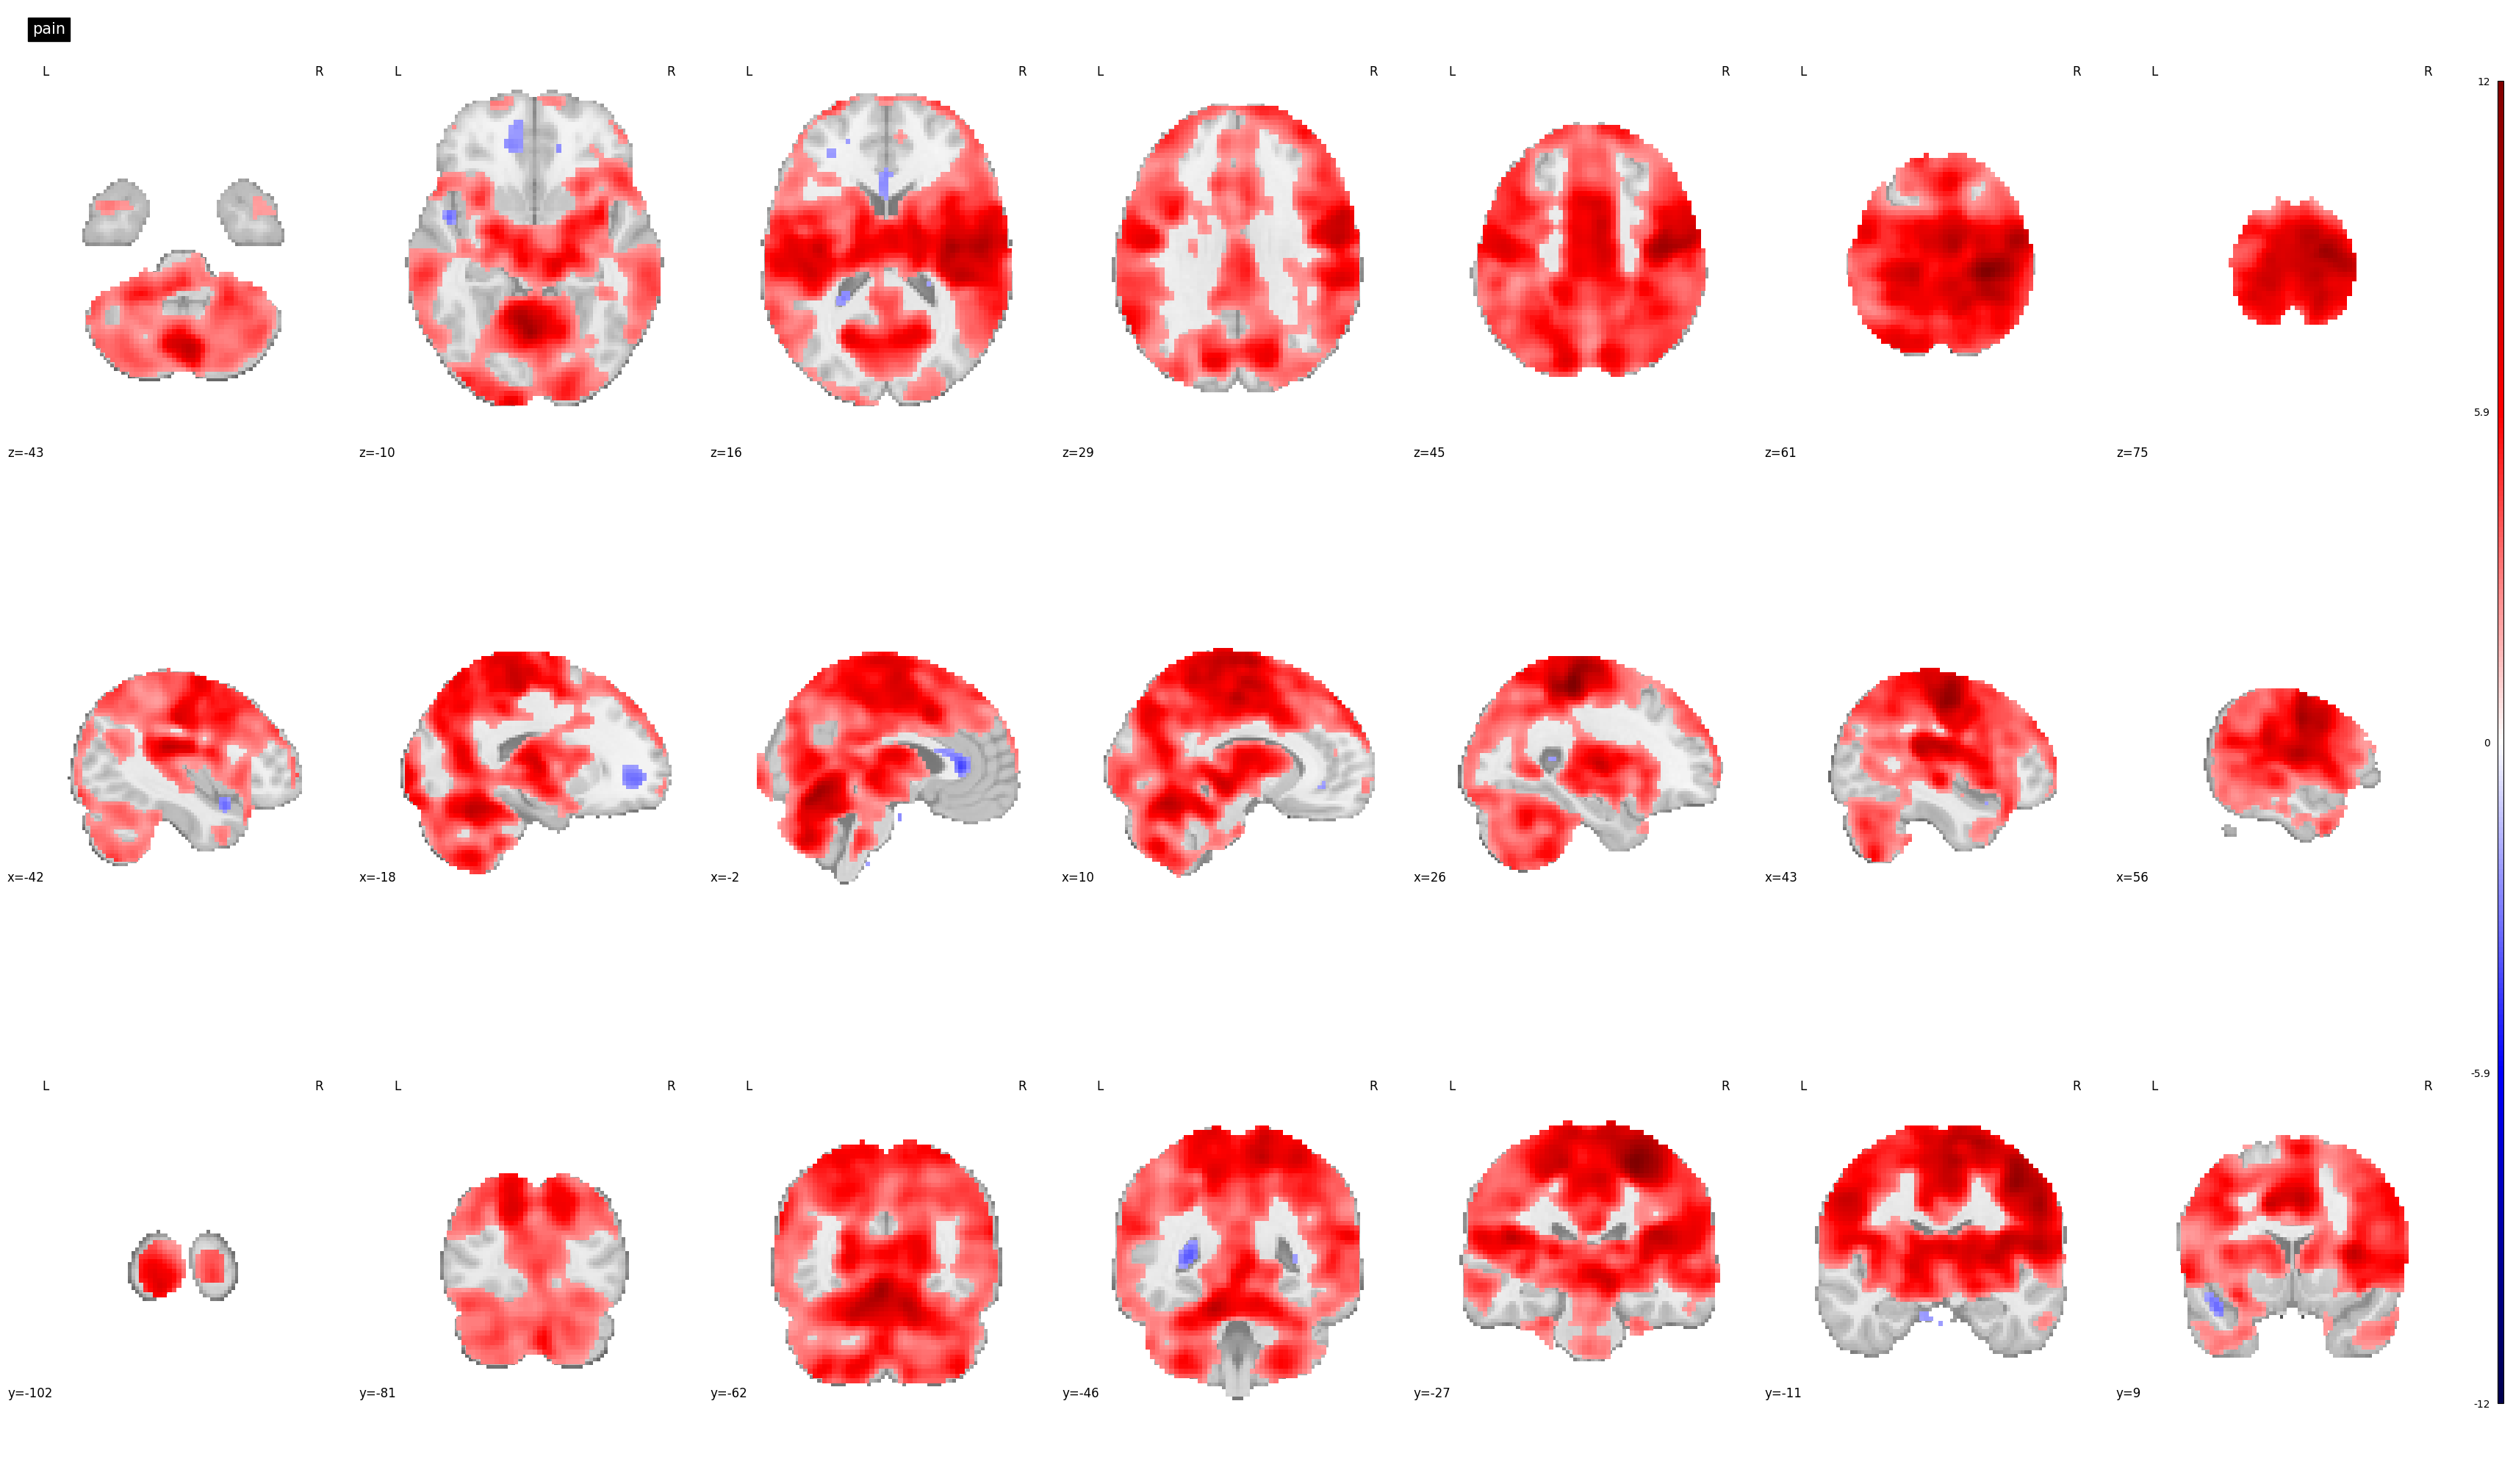

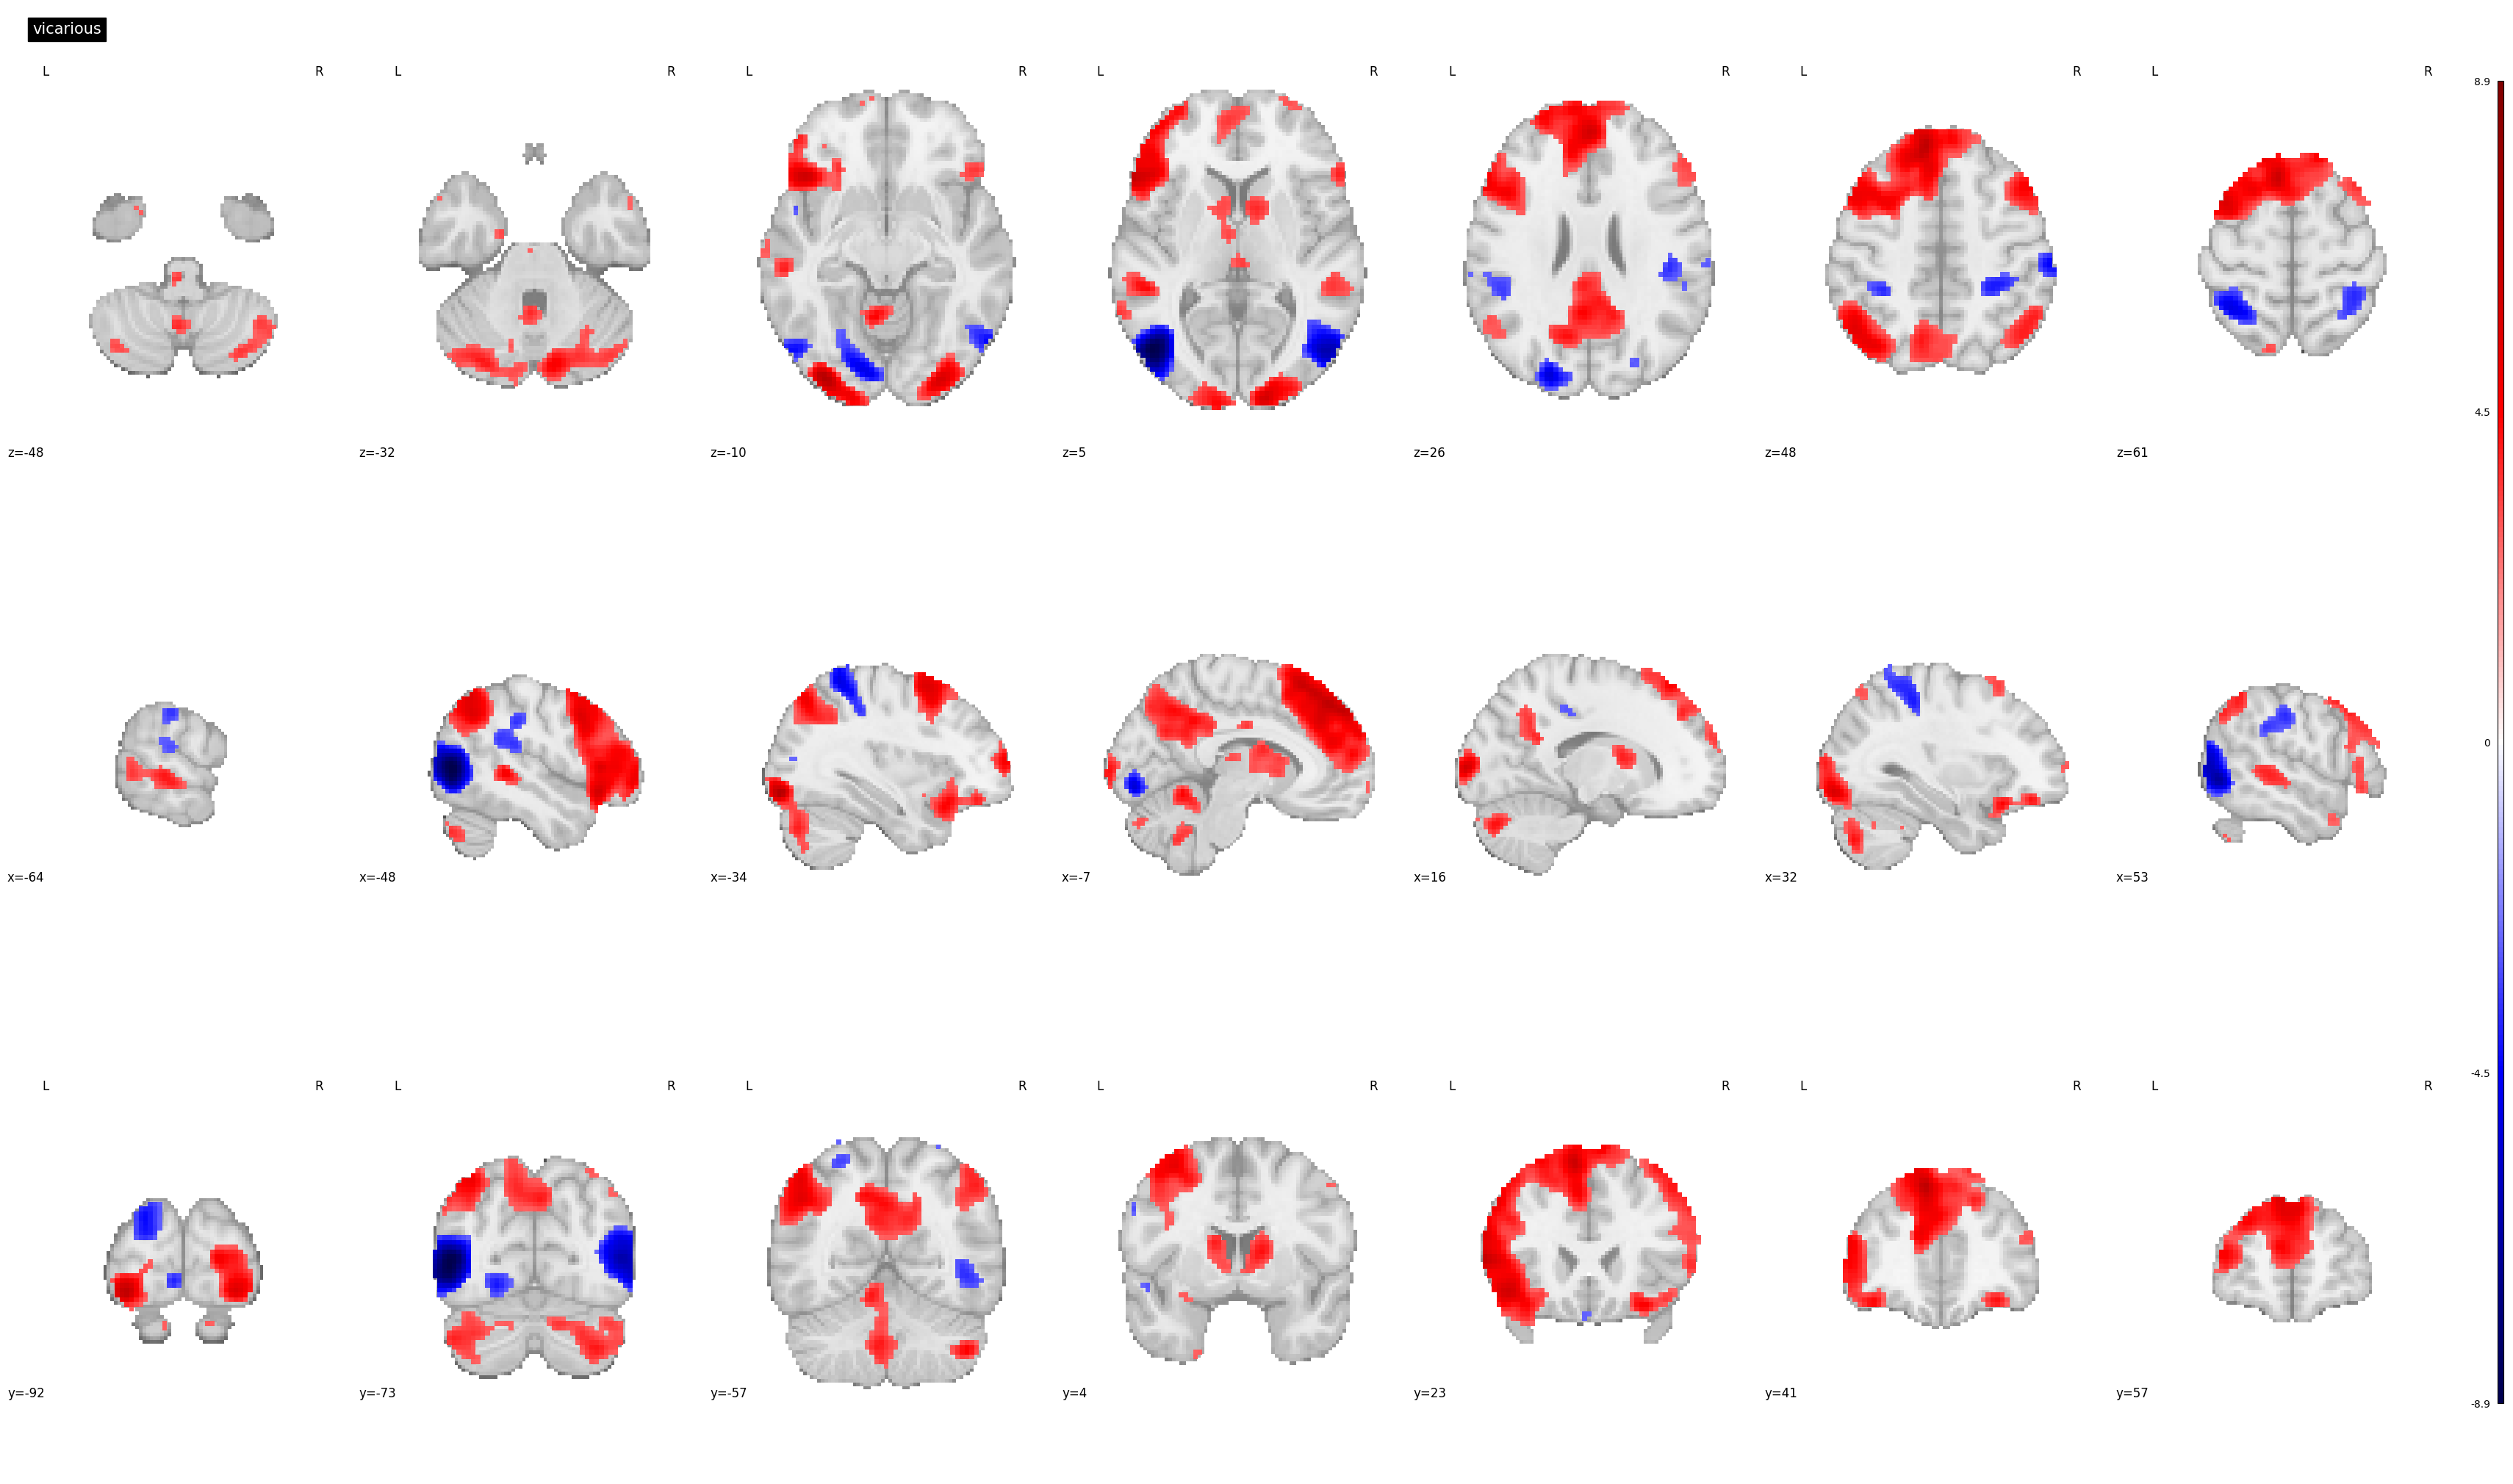

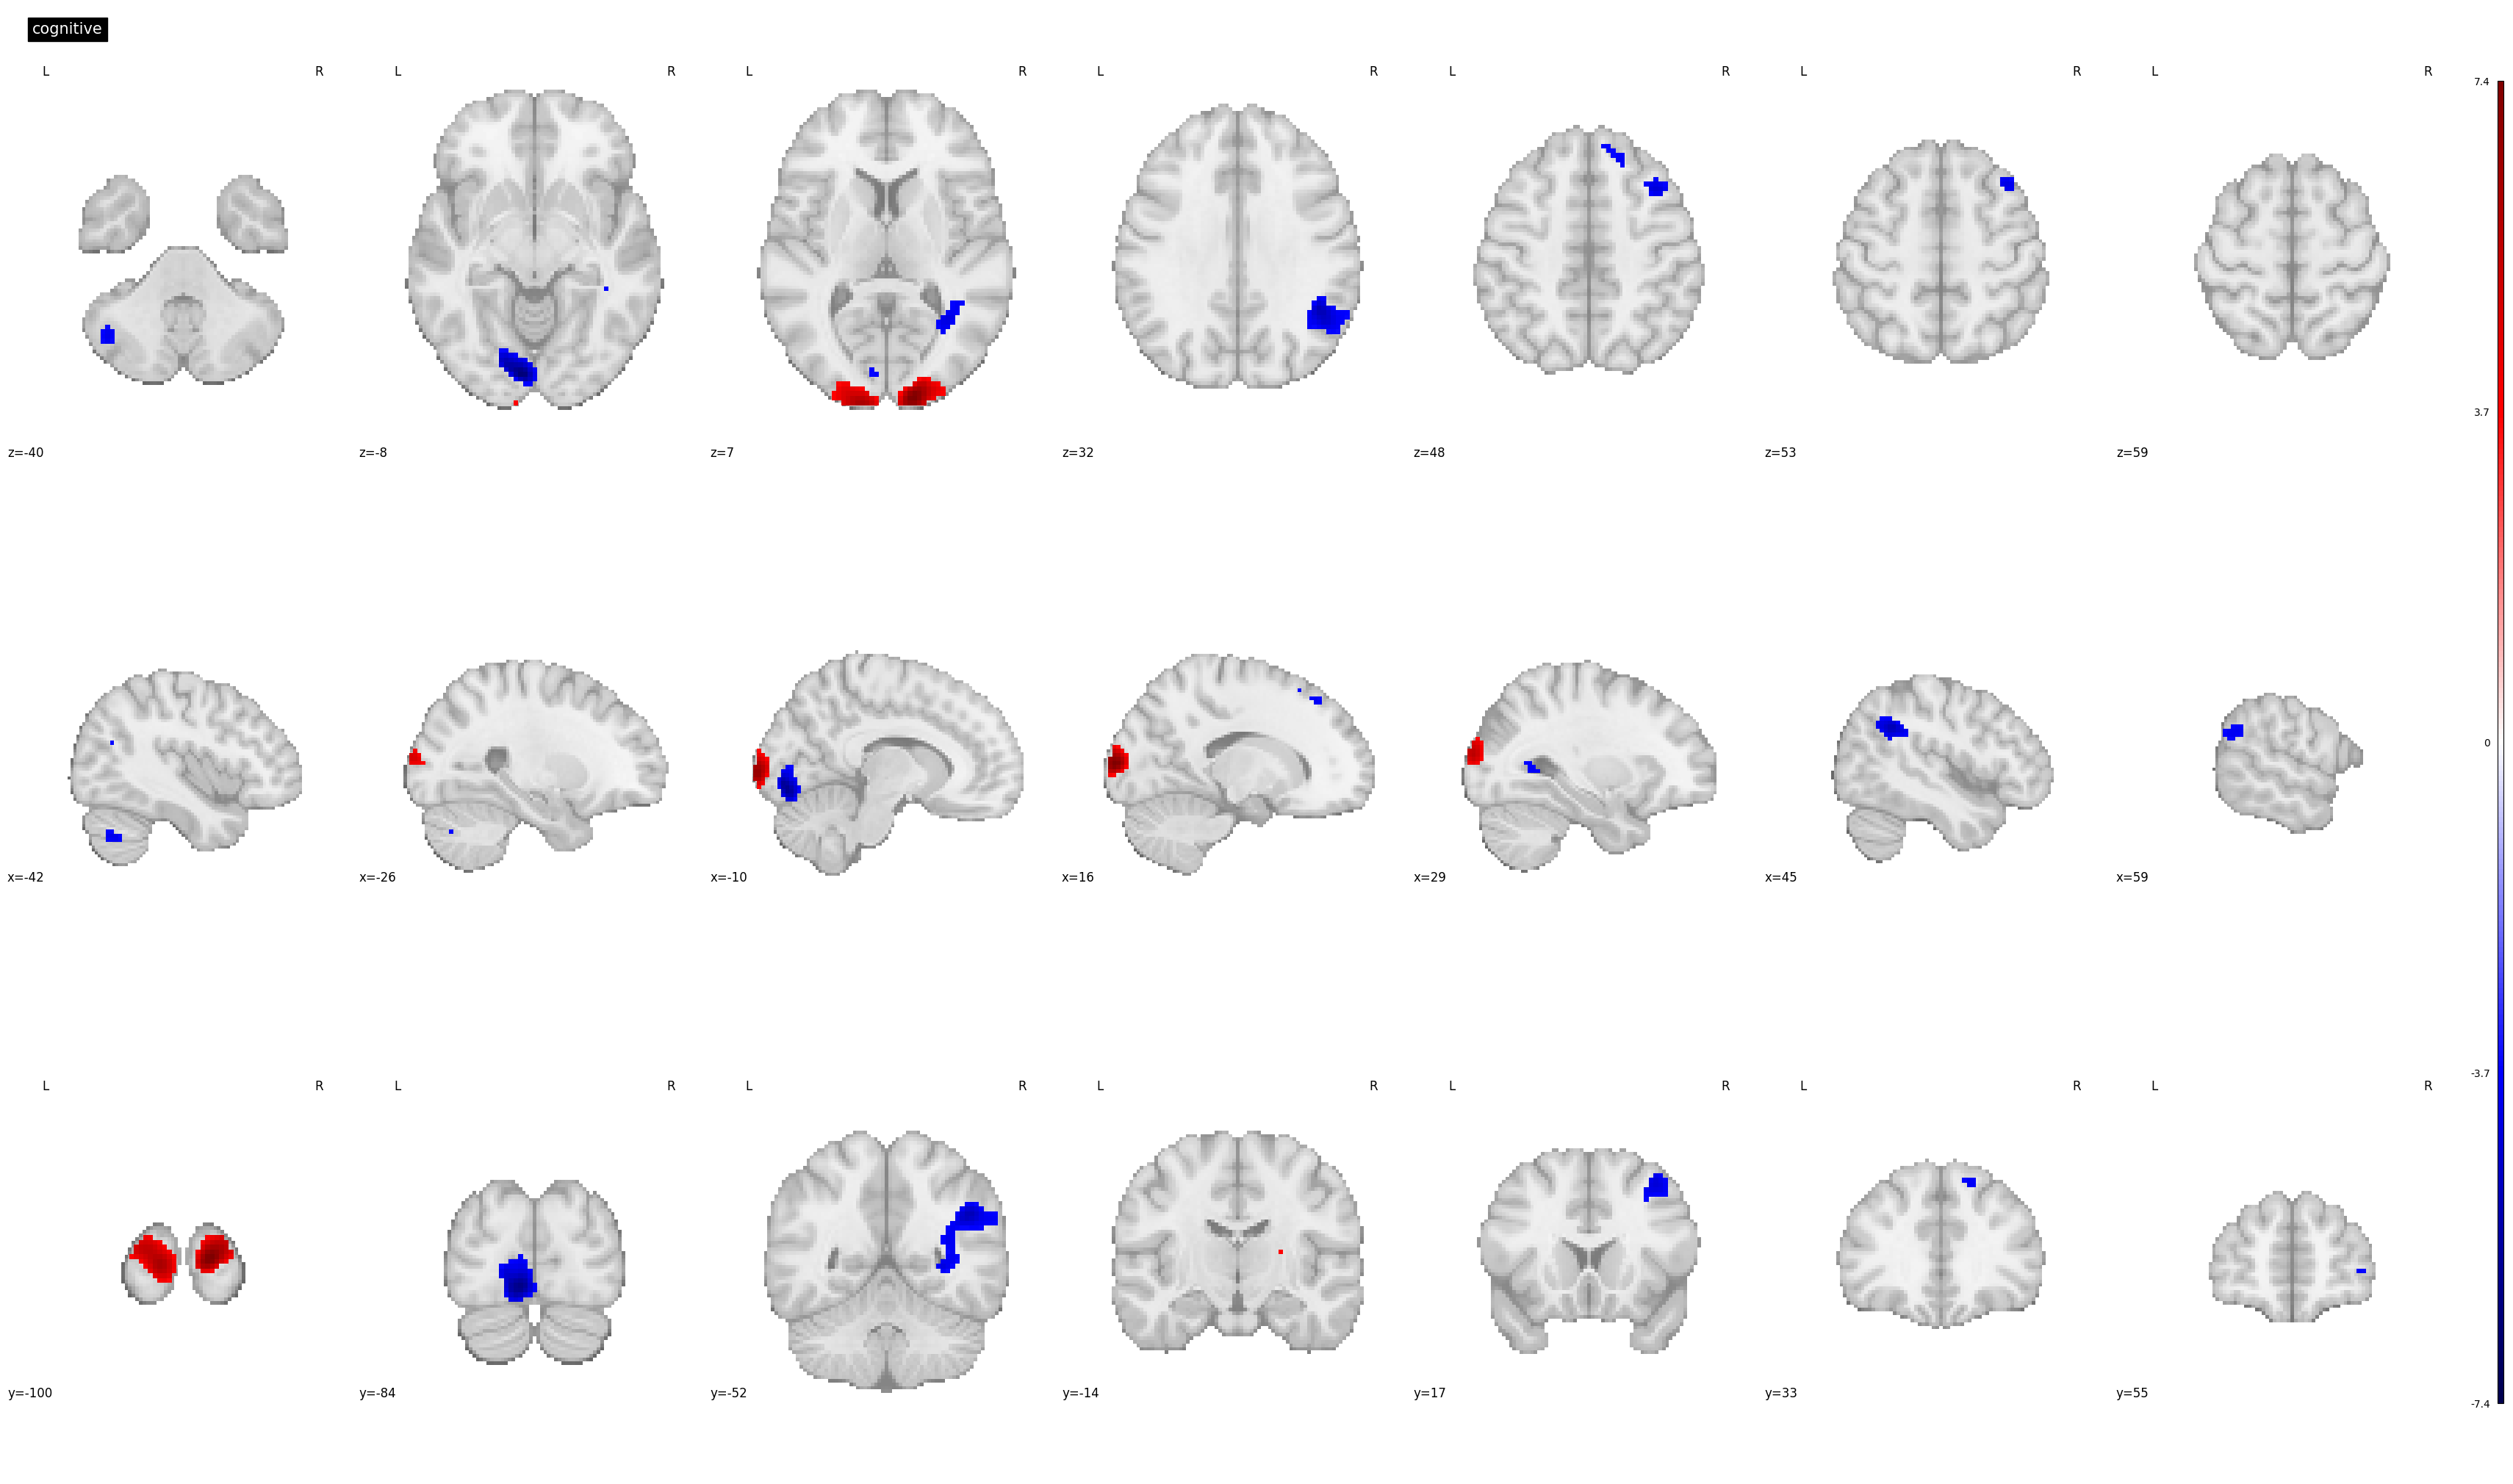

In [7]:
pain_mni = plotting.plot_stat_map(image.load_img(pain_fname), display_mode='mosaic', title='pain', cmap='seismic')
vic_mni = plotting.plot_stat_map(image.load_img(vic_fname), display_mode='mosaic', title='vicarious', cmap='seismic')
cog_mni = plotting.plot_stat_map(image.load_img(cog_fname), display_mode='mosaic', title='cognitive', cmap='seismic')


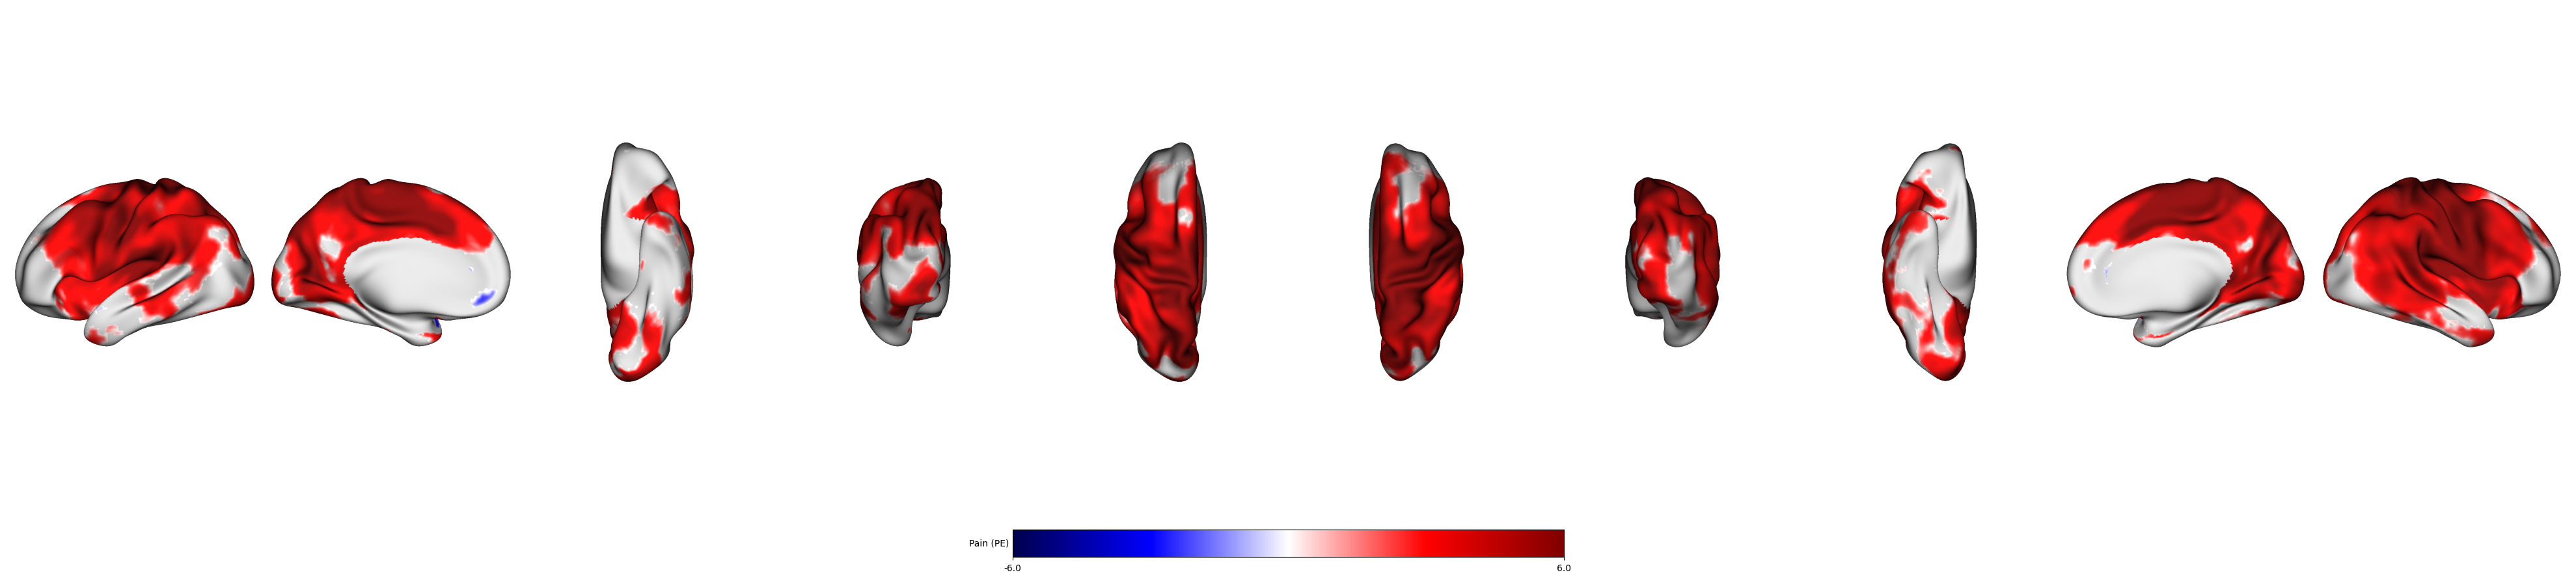

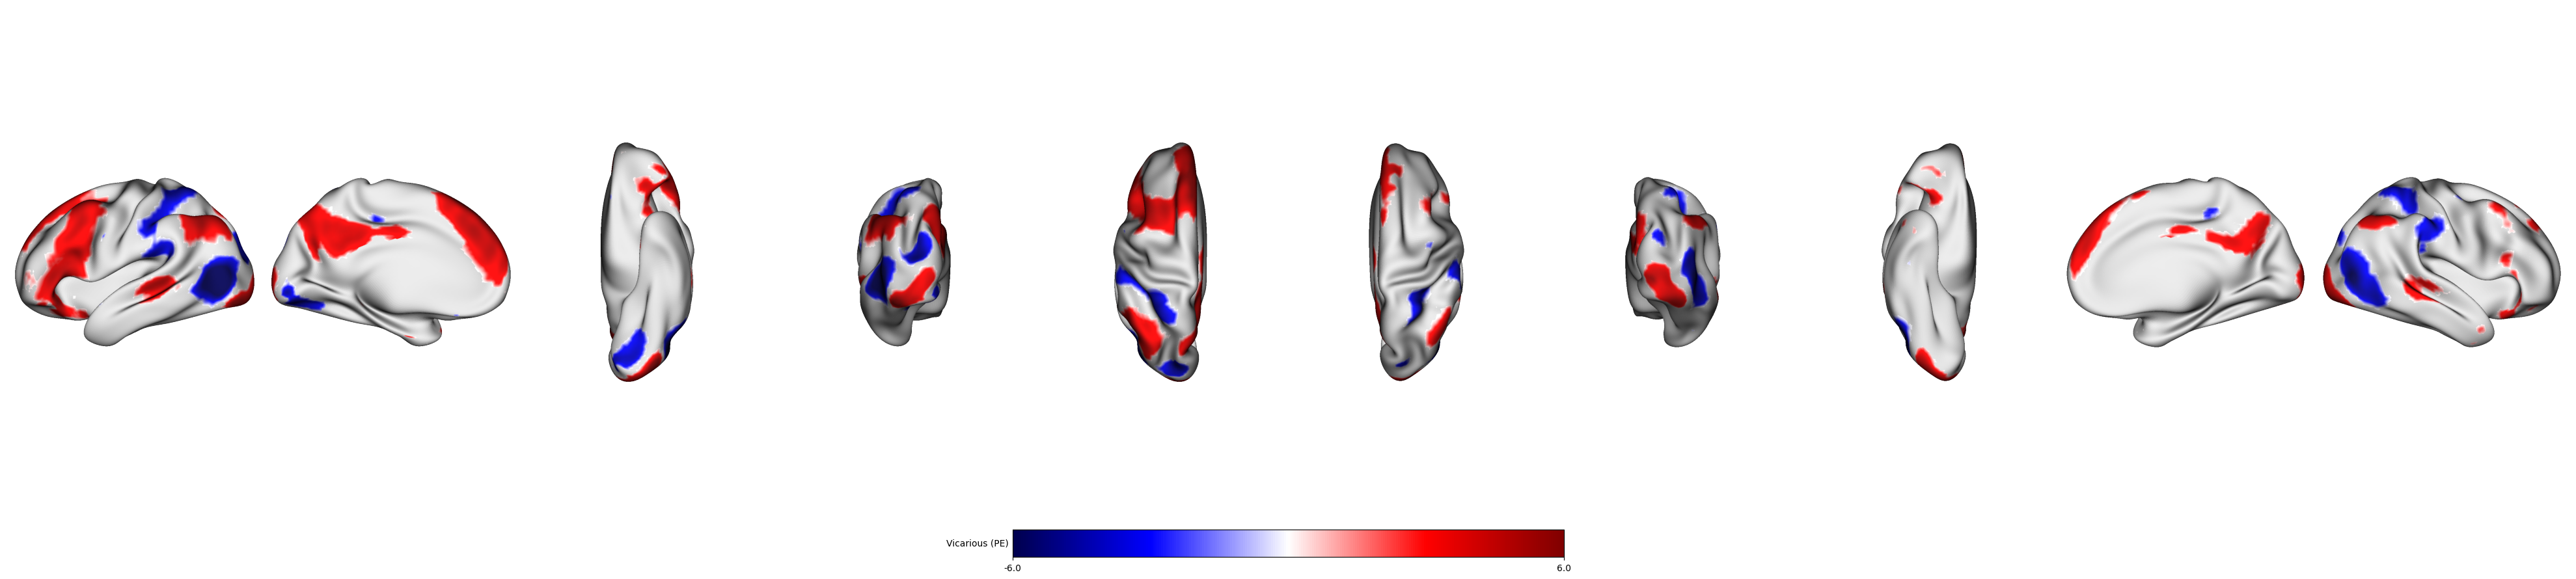

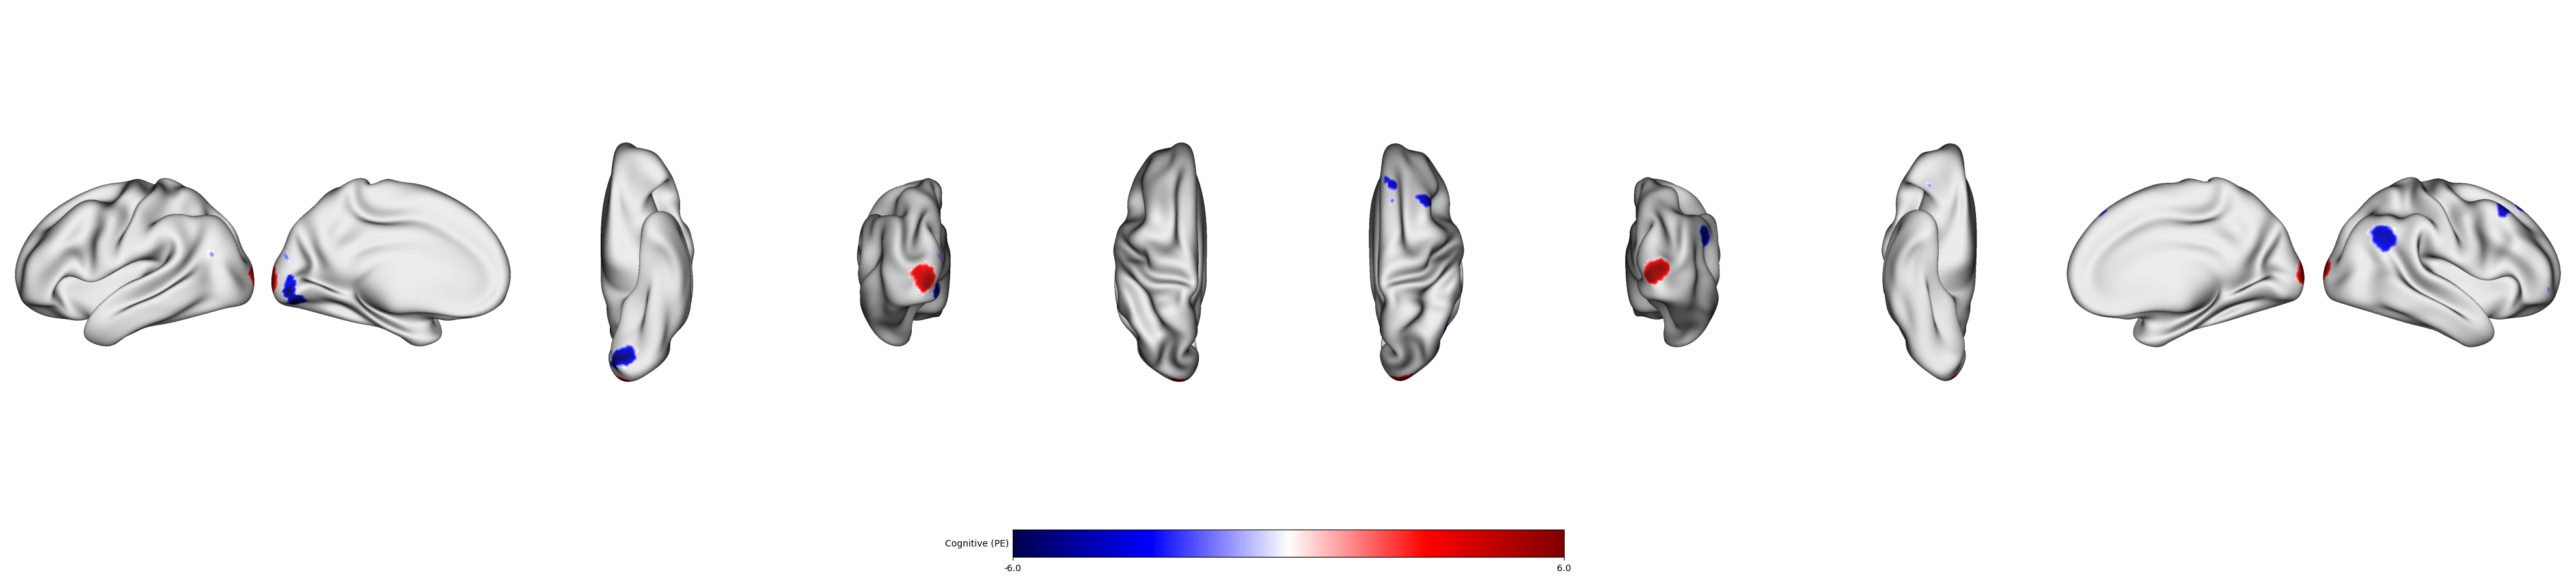

In [8]:

pain_fslr_nonmedial = nib.load(join(group_resultsdir, 'pain', 'group_task-pain_cov-PE_l2norm_fdr-05_fsLR_32k.gii'))
max_pain = max(np.nanmax(pain_fslr_nonmedial.agg_data()[0]), np.nanmax(pain_fslr_nonmedial.agg_data()[1]), 
               np.abs(np.nanmin(pain_fslr_nonmedial.agg_data()[0])), np.abs(np.nanmin(pain_fslr_nonmedial.agg_data()[1])))

imageL = pain_fslr_nonmedial.agg_data()[0]
imageR = pain_fslr_nonmedial.agg_data()[1]
p = plot_nonmedial_brain_surfaces(imageL, imageR, cbar_label='Pain (PE)', cmap='seismic', color_range=(-6, 6))
                        # -np.round(max_pain), np.round(np.max(max_pain)))

vic_stim_fslr = transforms.mni152_to_fslr(vic_fname, fslr_density='32k', 
    method='linear')
max_vic = max(np.max(vic_stim_fslr[0].agg_data()), np.max(vic_stim_fslr[1].agg_data()),
              np.abs(np.min(vic_stim_fslr[0].agg_data())), np.abs(np.min(vic_stim_fslr[0].agg_data())))
v = plot_brain_surfaces(vic_stim_fslr, cbar_label='Vicarious (PE)', cmap='seismic', color_range=(-6, 6))
                    # color_range=(-np.round(max_vic), np.round(max_vic)))

cog_stim_fslr = transforms.mni152_to_fslr(cog_fname, fslr_density='32k', 
    method='linear')
max_cog = max(np.max(cog_stim_fslr[0].agg_data()), np.nanmax(cog_stim_fslr[1].agg_data()),
np.abs(np.min(cog_stim_fslr[0].agg_data())), np.abs(np.nanmin(cog_stim_fslr[0].agg_data())))
c = plot_brain_surfaces(cog_stim_fslr, cbar_label='Cognitive (PE)', cmap='seismic', color_range=(-6, 6))
                    # color_range=(-np.round(max_cog), np.round(np.max(max_cog)))

### save

In [10]:

p.savefig(join(group_resultsdir,'pain', 'pain_covPE_q05.png'), dpi=300)
v.savefig(join(group_resultsdir, 'vicarious', 'vic_covPE_q05.png'), dpi=300)
c.savefig(join(group_resultsdir, 'cognitive', 'cog_covPE_q05.png'), dpi=300)

save_dir = '/Volumes/spacetop_projects_cue/analysis/fmri/nilearn/deriv04_covariate/figures'
p.savefig(join(save_dir, 'task-pain_cov-PE_q05.png'), dpi=300)
v.savefig(join(save_dir,  'task-vic_cov-PE_q05.png'), dpi=300)
c.savefig(join(save_dir,  'task-cog_cov-PE_q05.png'), dpi=300)

